In [1]:
import pandas as pd 
import numpy as np 
import sklearn
from pathlib import Path
import matplotlib.pyplot as plt 
import codecs

#### Load Data

In [2]:
def load_song_data_df(csv_path):
    """
    Helper function for loading song data.
    """
    csv_path = Path(csv_path)
    if not csv_path:
        return ValueError("File does not exist")
    
    # Need to use errors='ignore' for non utf-8 charecters.
    with open(csv_path, 'r', encoding='utf-8', errors='ignore') as fdata:
        # Read the CSV file using pandas
        song_data_df = pd.read_csv(fdata)

    return song_data_df

song_data_df = load_song_data_df('data/spotify-2023.csv')
song_data_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


#### Exploratory data analysis

In [3]:
song_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            951 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

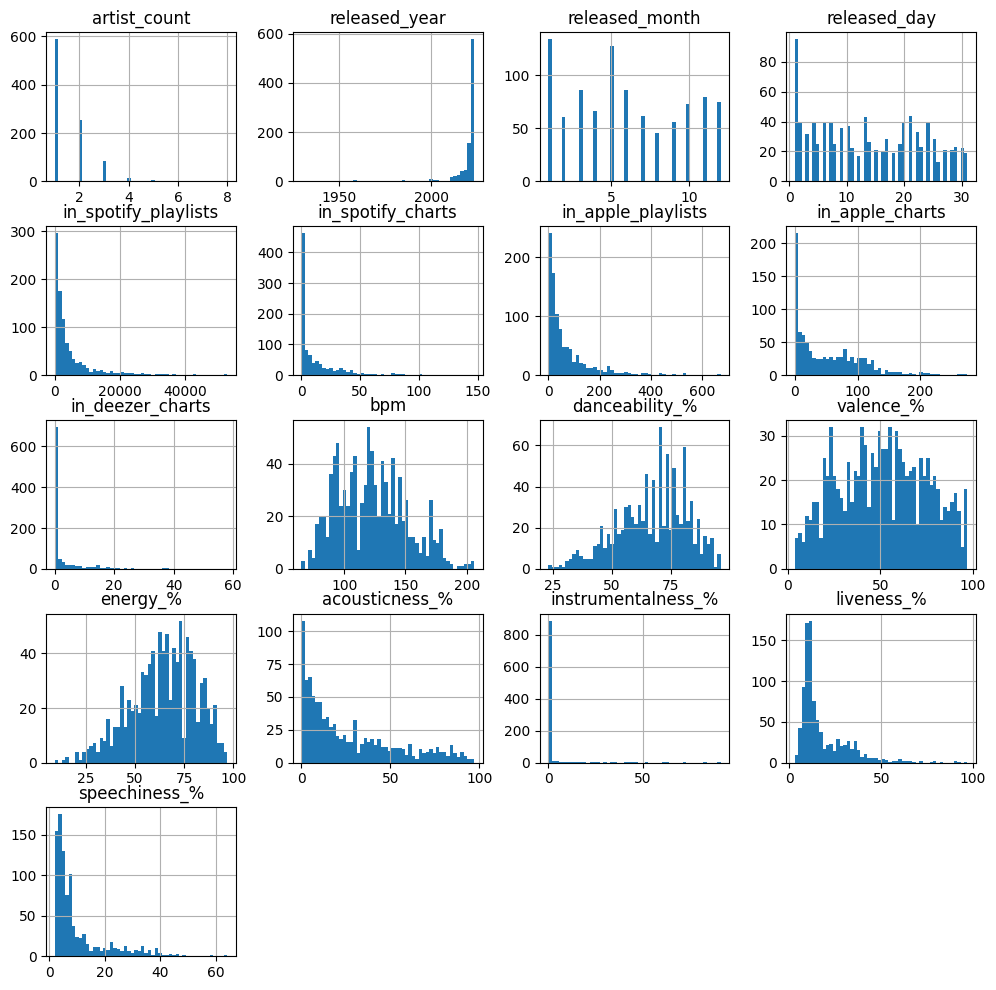

In [22]:
song_data_df.hist(bins=50, figsize=(12, 12))
plt.show()

In [10]:
# get list of categorical features
cat_cols = [col_name for col_name in song_data_df.select_dtypes(include='object')]

# get list of numeric features
numeric_cols = [col_name for col_name in song_data_df.select_dtypes(include='number')]


In [3]:
from sklearn.model_selection import train_test_split

song_df_train, song_df_test = train_test_split(song_data_df, test_size=0.2, random_state=914)

# train features and labels
train_features = song_df_train.drop("streams", axis=1)
train_labels   = song_df_train["streams"].copy()

# test features and labels
test_features = song_df_test.drop("streams", axis=1)
test_labels   = song_df_test["streams"].copy()

train_features.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
239,Efecto,Bad Bunny,1,2022,5,6,4004,33,34,65,...,98,G,Minor,80,23,48,14,0,6,5
271,PROVENZA,Karol G,1,2022,4,21,6587,34,114,104,...,111,C#,Major,87,53,52,66,1,11,5
855,Crazy What Love Can Do,"David Guetta, Ella Henderson, Becky Hill",3,2022,3,18,5290,0,139,73,...,123,E,Minor,60,46,71,3,0,16,4
713,Thinking with My Dick,"Kevin Gates, Juicy J",2,2013,7,16,1550,0,0,0,...,81,NaN,Major,77,68,70,6,0,17,20
186,Pink + White,Frank Ocean,1,2016,8,20,21574,30,112,68,...,160,A,Major,54,54,55,67,0,42,11


In [76]:
# get list of categorical features
cat_cols = [col_name for col_name in train_features.select_dtypes(include='object')]

# get list of numeric features
numeric_cols = [col_name for col_name in train_features.select_dtypes(include='number')]

array([[<Axes: title={'center': 'in_spotify_playlists'}>,
        <Axes: title={'center': 'in_spotify_charts'}>,
        <Axes: title={'center': 'in_apple_playlists'}>],
       [<Axes: title={'center': 'in_apple_charts'}>,
        <Axes: title={'center': 'in_deezer_charts'}>,
        <Axes: title={'center': 'acousticness_%'}>],
       [<Axes: title={'center': 'liveness_%'}>,
        <Axes: title={'center': 'speechiness_%'}>, <Axes: >]],
      dtype=object)

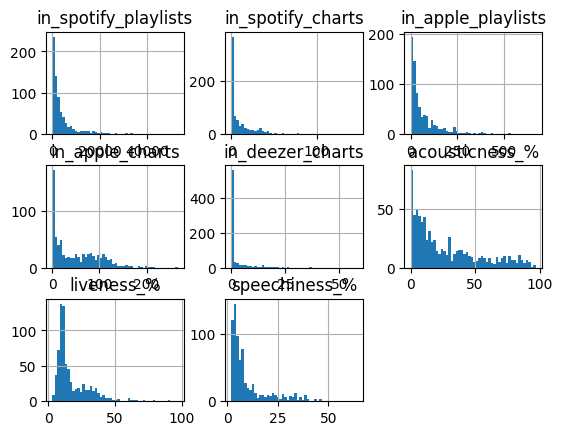

In [75]:
# get all left skewed feature cols
left_skewed_features = ["in_spotify_playlists", "in_spotify_charts", "in_apple_playlists",
               "in_apple_charts", "in_deezer_charts", "acousticness_%", "liveness_%", "speechiness_%"]
train_features[left_skewed_features].hist(bins=50)

In [82]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.preprocessing import OneHotEncoder

# Get all left skewed feature cols.
left_skewed_features = ["in_spotify_playlists", "in_spotify_charts", "in_apple_playlists",
               "in_apple_charts", "in_deezer_charts", "acousticness_%", "liveness_%", "speechiness_%"]

# Non left skewed features.
non_skewed_features = list(set(numeric_cols) - set(left_skewed_features))

# Impute, yeo-johnson transform, and standard scale only left skewed numeric features.
impute_scale_log_transform = make_pipeline(
        SimpleImputer(strategy="median"),
        PowerTransformer(method='yeo-johnson', standardize=True),
)

# Impute and standard scale all other numeric features.
impute_scale_transform = make_pipeline(
        SimpleImputer(strategy="median"),
        StandardScaler(),
)

# Categorical one hot encoding.
cat_pipeline = make_pipeline(
        SimpleImputer(strategy="most_frequent"),
        OneHotEncoder(handle_unknown="ignore")
)

# Tie it all together, apply impute_scale_log on skewed columns, and impute_scale on non scaled columns.
# TODO: fix one_hot_encoding
preprocessing = ColumnTransformer([
    ("impute_standardize_yeo-johnson", impute_scale_log_transform, left_skewed_features),
    ("impute_standardize", impute_scale_transform, non_skewed_features),
#    ("one_hot_encoded", cat_pipeline, cat_cols),
])

transformed_skewed_df = preprocessing.fit_transform(train_features)

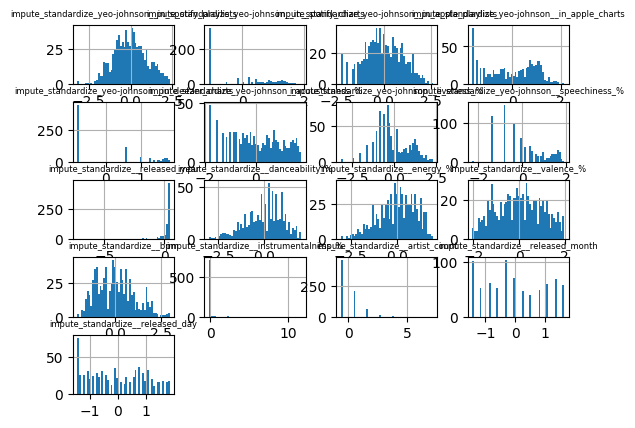

In [83]:
df_song_num_prepared = pd.DataFrame(
        transformed_skewed_df, columns=preprocessing.get_feature_names_out(),
        index=train_features.index
)
axes = df_song_num_prepared.hist(bins=50)
# Iterate through each subplot and adjust title size
for ax in axes.flatten():
    ax.set_title(ax.get_title(), fontsize=6)  # Adjust the fontsize as needed

# Show the plots
plt.show()


AttributeError: Estimator functiontransformer does not provide get_feature_names_out. Did you mean to call pipeline[:-1].get_feature_names_out()?

In [7]:
# simple numeric transformations
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from scipy.stats import boxcox

# Define a function to apply Box-Cox transformation
def boxcox_transform(X):
    transformed, _ = boxcox(X)
    return transformed.reshape(-1, 1)  # Ensure output is 2D array


# get all left skewed feature cols
left_skewed_features = ["in_spotify_playlists", "in_spotify_charts", "in_apple_playlists",
               "in_apple_charts", "in_deezer_charts", "liveness_%", "speechiness_%"]

# impute, then standardize
impute_standardize_pipeline = make_pipeline(
        SimpleImputer(strategy="median"),
        StandardScaler(),
)

# impute, boxcox, then standardize
log_transform = make_pipeline(FunctionTransformer(np.log, feature_names_out="one-to-one"))

# tie it all together, apply the boxcox only on select columns, the rest, apply normal transforms.
preprocessing = ColumnTransformer([
    ("impute_standardize", impute_standardize_pipeline, slice(None), dtype_include=np.numer),  # Apply to all columns
    ("log", log_transform, left_skewed_features)  # Apply Box-Cox to selected columns
])

song_num_df = song_df_features[numeric_cols]
song_num_prepared = preprocessing.fit_transform(song_num_df)
df_song_num_prepared = pd.DataFrame(
        song_num_prepared, columns=preprocessing.get_feature_names_out(),
        index=song_num_df.index)

df_song_num_prepared.hist(bins=50, figsize=(12, 12))
plt.show()

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (2304062437.py, line 32)

In [ ]:
# from the above we can see that the following columns are heavily left skewed 

left_skewed = ["in_spotify_playlists", "in_spotify_charts", "in_apple_playlists",
               "in_apple_charts", "in_deezer_charts", "liveliness_%", "speechiness_%"]

In [35]:
df_song_num_prepared["speechiness_%"]

239   -0.532188
271   -0.532188
855   -0.630522
713    0.942815
186    0.057813
         ...   
211   -0.138854
340   -0.728855
650   -0.335521
745    0.549481
652   -0.728855
Name: speechiness_%, Length: 762, dtype: float64

In [36]:
song_num_df["speechiness_%"]

239     5
271     5
855     4
713    20
186    11
       ..
211     9
340     3
650     7
745    16
652     3
Name: speechiness_%, Length: 762, dtype: int64

In [8]:
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
        ("impute", SimpleImputer(strategy="median")),
        ("standardize", StandardScaler()),
    ])

cat_pipeline = make_pipeline(
        SimpleImputer(strategy="most_frequent"),
        OneHotEncoder(handle_unknown="ignore")
    )

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
    )

In [28]:
song_df_features_prepared = preprocessing.fit_transform(song_df_features)
df_song_df_features = pd.DataFrame(
        song_df_features_prepared, columns=preprocessing.get_feature_names_out(),
        index=song_df_features.index)


ValueError: Shape of passed values is (762, 1), indices imply (762, 1795)

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(song_df_features, song_df_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x131c90670>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x13192cb20>)])),
                ('linearregression', LinearRegression())])

In [14]:
from sklearn.metrics import mean_squared_error

# test on training set
stream_predictions = lin_reg.predict(song_df_features)
lin_rmse = mean_squared_error(song_df_labels, stream_predictions, squared=False)
lin_rmse

/Users/victordominguez/.virtualenvs/spotify_song_popularity/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


38998.222166901716

In [15]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(song_df_features, song_df_labels)
stream_predictions = tree_reg.predict(song_df_features)
tree_rmse = mean_squared_error(song_df_labels, stream_predictions, squared=False)
tree_rmse

/Users/victordominguez/.virtualenvs/spotify_song_popularity/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.0

In [18]:
# cross validation
from sklearn.model_selection import cross_val_score
tree_rmses = -cross_val_score(tree_reg, song_df_features, song_df_labels, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(tree_rmses).describe()

count    1.000000e+01
mean     3.185422e+08
std      4.467380e+07
min      2.523369e+08
25%      2.761992e+08
50%      3.321993e+08
75%      3.466142e+08
max      3.798989e+08
dtype: float64

In [21]:
# random forrest regressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_reg.fit(song_df_features, song_df_labels)
stream_predictions = forest_reg.predict(song_df_features)
forest_rmses = mean_squared_error(song_df_labels, stream_predictions, squared=False)
pd.Series(forest_rmses).describe()

/Users/victordominguez/.virtualenvs/spotify_song_popularity/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


count    1.000000e+00
mean     8.771485e+07
std               NaN
min      8.771485e+07
25%      8.771485e+07
50%      8.771485e+07
75%      8.771485e+07
max      8.771485e+07
dtype: float64